In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [99]:
# 📌 1. CSV 파일 로드
df = pd.read_csv('./data/Ecommerce_Consumer_Behavior_Analysis_Data.csv')
lst = ['Purchase_Amount','Age', 'Gender', 'Income_Level', 'Marital_Status', 'Education_Level', 'Occupation', 'Purchase_Channel', 'Time_to_Decision']
custom_df = df.loc[:, lst]
custom_df

,Purchase_Amount,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision
0,$333.80,22,Female,Middle,Married,Bachelor's,Middle,Mixed,2
1,$222.22,49,Male,High,Married,High School,High,In-Store,6
2,$426.22,24,Female,Middle,Single,Master's,High,Mixed,3
3,$101.31,29,Female,Middle,Single,Master's,Middle,Mixed,10
4,$211.70,33,Female,Middle,Widowed,High School,Middle,Mixed,4
...,...,...,...,...,...,...,...,...,...
995,$463.67,44,Female,High,Divorced,Bachelor's,High,Online,5
996,$69.78,50,Female,High,Single,High School,Middle,Mixed,9
997,$453.37,26,Male,High,Married,Bachelor's,High,Mixed,9
998,$106.15,21,Female,High,Widowed,Bachelor's,Middle,In-Store,8


In [100]:
custom_df['Gender'].value_counts()

Gender
Female         452
Male           449
Bigender        20
Agender         19
Genderfluid     17
Non-binary      16
Polygender      15
Genderqueer     12
Name: count, dtype: int64

In [101]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Purchase_Amount   1000 non-null   object
 1   Age               1000 non-null   int64 
 2   Gender            1000 non-null   object
 3   Income_Level      1000 non-null   object
 4   Marital_Status    1000 non-null   object
 5   Education_Level   1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Purchase_Channel  1000 non-null   object
 8   Time_to_Decision  1000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [102]:
gender_filtered_df = custom_df[custom_df['Gender'].isin(['Female', 'Male'])]
gender_filtered_df

,Purchase_Amount,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision
0,$333.80,22,Female,Middle,Married,Bachelor's,Middle,Mixed,2
1,$222.22,49,Male,High,Married,High School,High,In-Store,6
2,$426.22,24,Female,Middle,Single,Master's,High,Mixed,3
3,$101.31,29,Female,Middle,Single,Master's,Middle,Mixed,10
4,$211.70,33,Female,Middle,Widowed,High School,Middle,Mixed,4
...,...,...,...,...,...,...,...,...,...
995,$463.67,44,Female,High,Divorced,Bachelor's,High,Online,5
996,$69.78,50,Female,High,Single,High School,Middle,Mixed,9
997,$453.37,26,Male,High,Married,Bachelor's,High,Mixed,9
998,$106.15,21,Female,High,Widowed,Bachelor's,Middle,In-Store,8


In [103]:
gender_filtered_df['Gender'].value_counts()

Gender
Female    452
Male      449
Name: count, dtype: int64

In [104]:
gender_filtered_df.to_csv('./data/Ecommerce_Comsumer_Behavior_custom_data.csv', index=False)

In [105]:
# Age 컬럼을 숫자형으로 변환 (문자열일 경우 대비)
gender_filtered_df["Age"] = pd.to_numeric(gender_filtered_df["Age"], errors='coerce')

# 나이대별 그룹화 함수 정의
def age_group(age):
    if age < 20:
        return "10대 미만"
    elif age < 30:
        return "20대"
    elif age < 40:
        return "30대"
    elif age < 50:
        return "40대"
    elif age < 60:
        return "50대"
    else:
        return "60대 이상"

# 새로운 Age_Group 컬럼 생성
gender_filtered_df["Age_Group"] = gender_filtered_df["Age"].apply(age_group)

# 기존 Age 컬럼 삭제
gender_filtered_df = gender_filtered_df.drop(columns=["Age"])

# 변경된 데이터 확인
print(gender_filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Purchase_Amount   901 non-null    object
 1   Gender            901 non-null    object
 2   Income_Level      901 non-null    object
 3   Marital_Status    901 non-null    object
 4   Education_Level   901 non-null    object
 5   Occupation        901 non-null    object
 6   Purchase_Channel  901 non-null    object
 7   Time_to_Decision  901 non-null    int64 
 8   Age_Group         901 non-null    object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
None


In [106]:
gender_filtered_df['Age_Group'].value_counts()

Age_Group
20대       279
40대       277
30대       270
10대 미만     45
50대        30
Name: count, dtype: int64

In [108]:
# 변환할 컬럼 선택 (Purchase_Channel, Time_to_Decision 제외)
categorical_columns = gender_filtered_df.columns.difference(['Purchase_Channel', 'Time_to_Decision'])

# 각 컬럼을 범주형 데이터로 변환
gender_filtered_df[categorical_columns] = gender_filtered_df[categorical_columns].astype('category')

print(gender_filtered_df)

custom_df = gender_filtered_df

    Purchase_Amount  Gender Income_Level Marital_Status Education_Level  \
0          $333.80   Female       Middle        Married      Bachelor's   
1          $222.22     Male         High        Married     High School   
2          $426.22   Female       Middle         Single        Master's   
3          $101.31   Female       Middle         Single        Master's   
4          $211.70   Female       Middle        Widowed     High School   
..              ...     ...          ...            ...             ...   
995        $463.67   Female         High       Divorced      Bachelor's   
996         $69.78   Female         High         Single     High School   
997        $453.37     Male         High        Married      Bachelor's   
998        $106.15   Female         High        Widowed      Bachelor's   
999        $378.47   Female       Middle         Single     High School   

    Occupation Purchase_Channel  Time_to_Decision Age_Group  
0       Middle            Mixed      

In [109]:
# Purchase_Amount에서 앞에 붙은 '$' 제거 후 숫자로 변환
custom_df["Purchase_Amount"] = custom_df["Purchase_Amount"].astype(str).str.replace("$", "", regex=False)
custom_df["Purchase_Amount"] = pd.to_numeric(custom_df["Purchase_Amount"], errors='coerce')

# 변환된 데이터 확인
print(custom_df[["Purchase_Amount"]].head())

   Purchase_Amount
0           333.80
1           222.22
2           426.22
3           101.31
4           211.70


In [111]:
custom_df

,Purchase_Amount,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision,Age_Group
0,333.80,Female,Middle,Married,Bachelor's,Middle,Mixed,2,20대
1,222.22,Male,High,Married,High School,High,In-Store,6,40대
2,426.22,Female,Middle,Single,Master's,High,Mixed,3,20대
3,101.31,Female,Middle,Single,Master's,Middle,Mixed,10,20대
4,211.70,Female,Middle,Widowed,High School,Middle,Mixed,4,30대
...,...,...,...,...,...,...,...,...,...
995,463.67,Female,High,Divorced,Bachelor's,High,Online,5,40대
996,69.78,Female,High,Single,High School,Middle,Mixed,9,50대
997,453.37,Male,High,Married,Bachelor's,High,Mixed,9,20대
998,106.15,Female,High,Widowed,Bachelor's,Middle,In-Store,8,20대


In [ ]:
custom_df['Purchase_Amount'].value_counts()

Purchase_Amount
430.75    2
253.37    2
490.41    2
365.88    2
378.87    2
         ..
463.67    1
69.78     1
453.37    1
106.15    1
58.51     1
Name: count, Length: 890, dtype: int64

In [115]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Purchase_Amount   901 non-null    float64 
 1   Gender            901 non-null    category
 2   Income_Level      901 non-null    category
 3   Marital_Status    901 non-null    category
 4   Education_Level   901 non-null    category
 5   Occupation        901 non-null    category
 6   Purchase_Channel  901 non-null    object  
 7   Time_to_Decision  901 non-null    int64   
 8   Age_Group         901 non-null    category
dtypes: category(6), float64(1), int64(1), object(1)
memory usage: 34.3+ KB


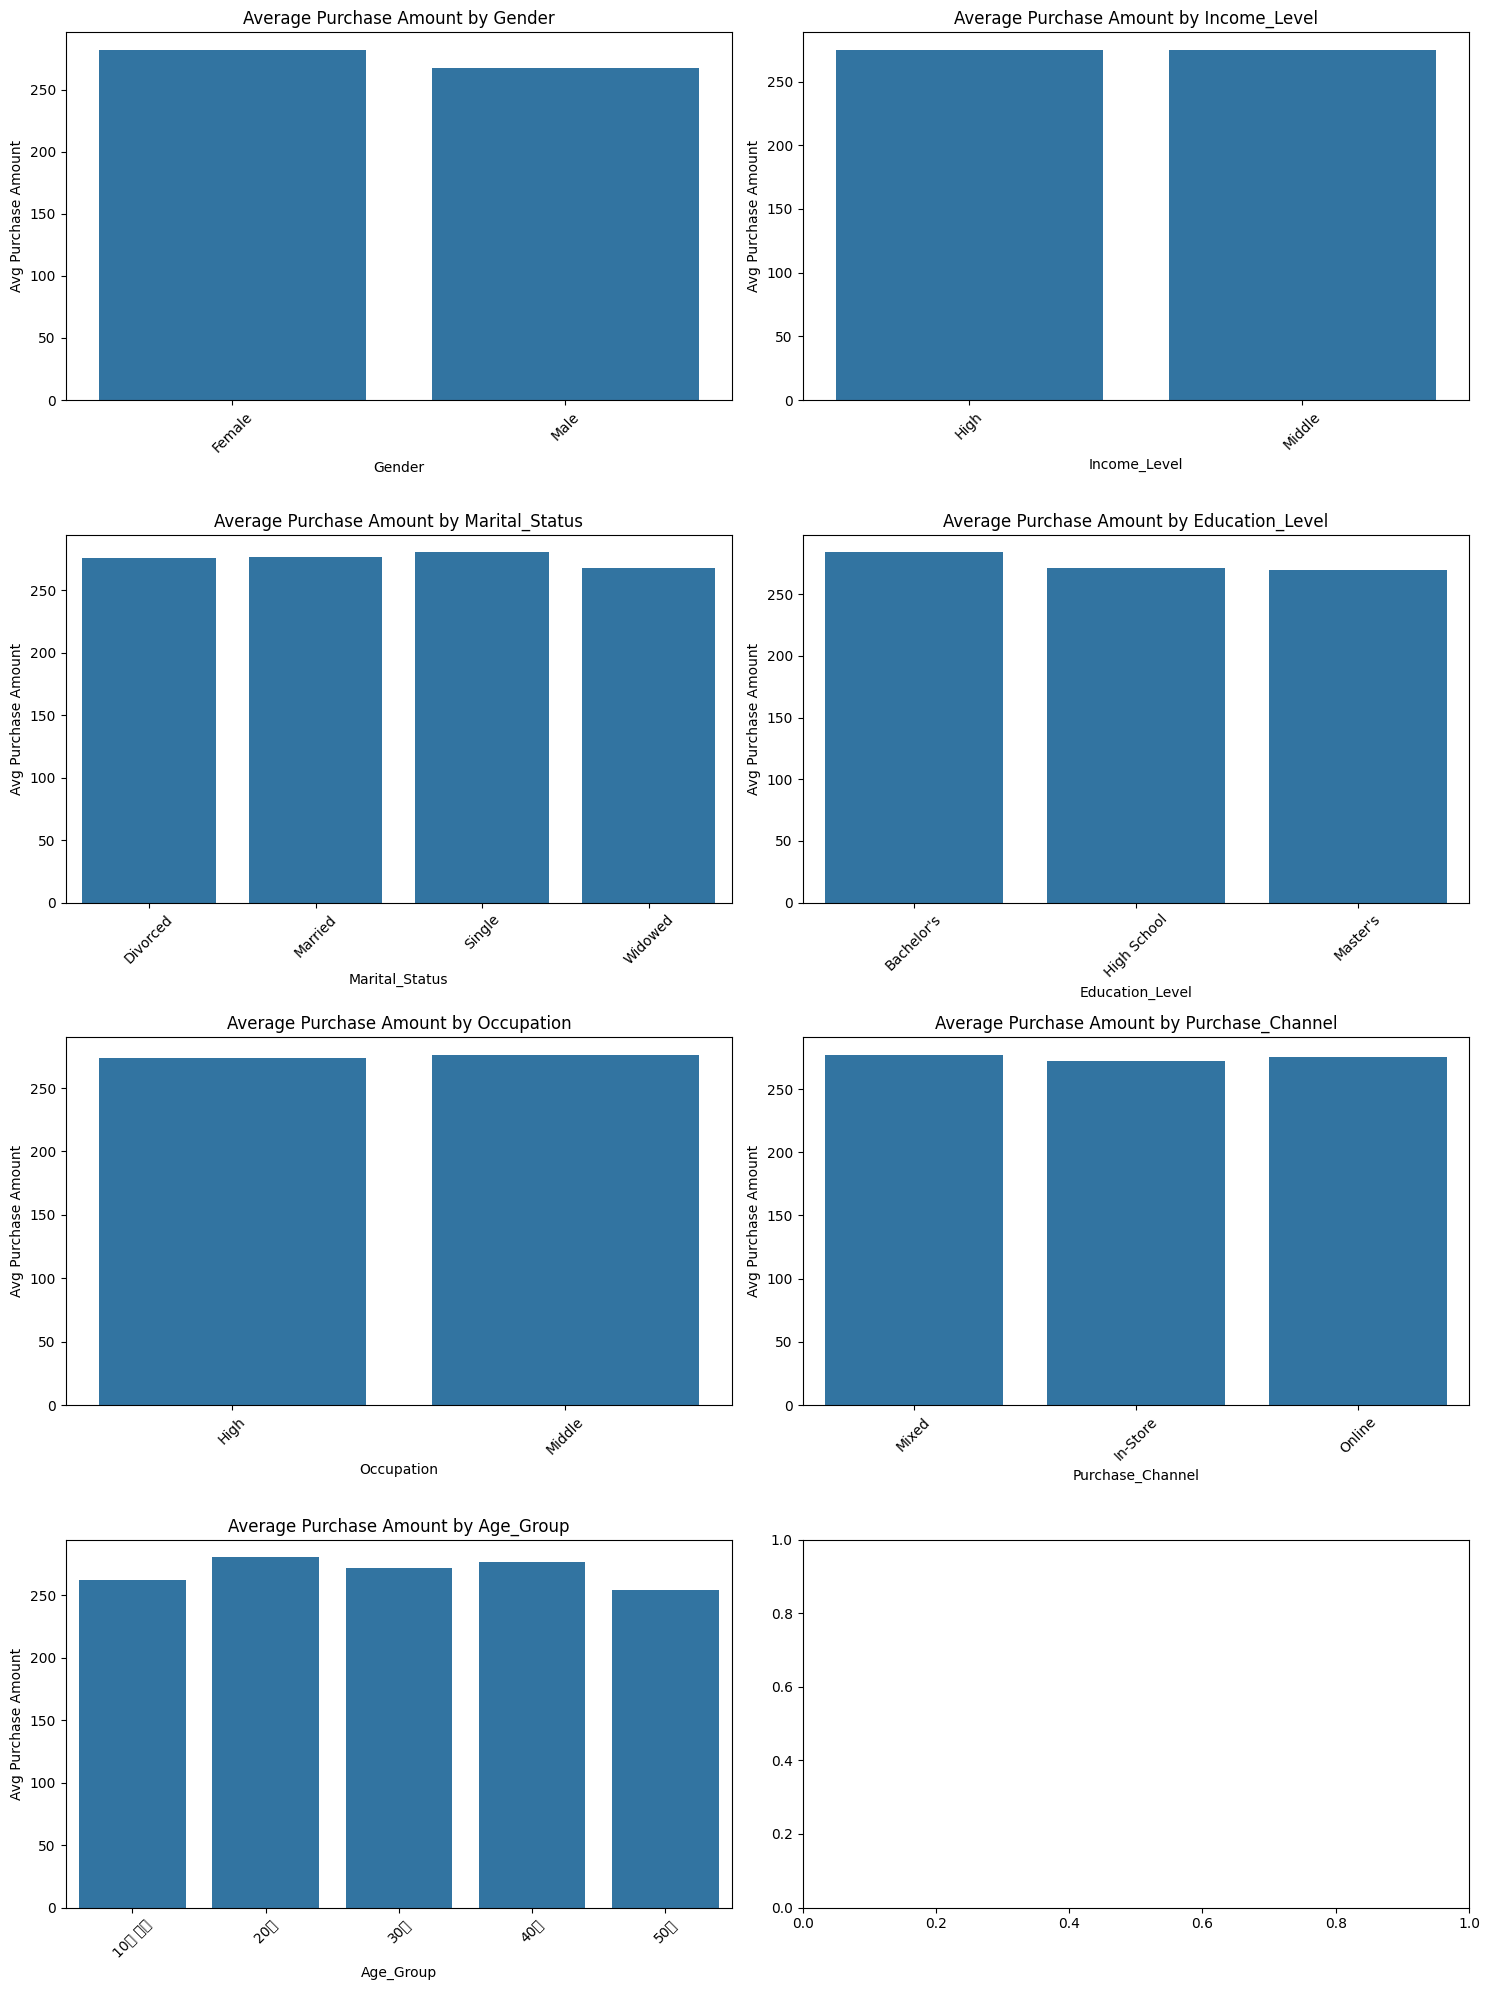

In [143]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 2x2 서브플롯 생성
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    ax.set_title(f"Average Purchase Amount by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Avg Purchase Amount")
    ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

# 레이아웃 조정
plt.tight_layout()
plt.show()


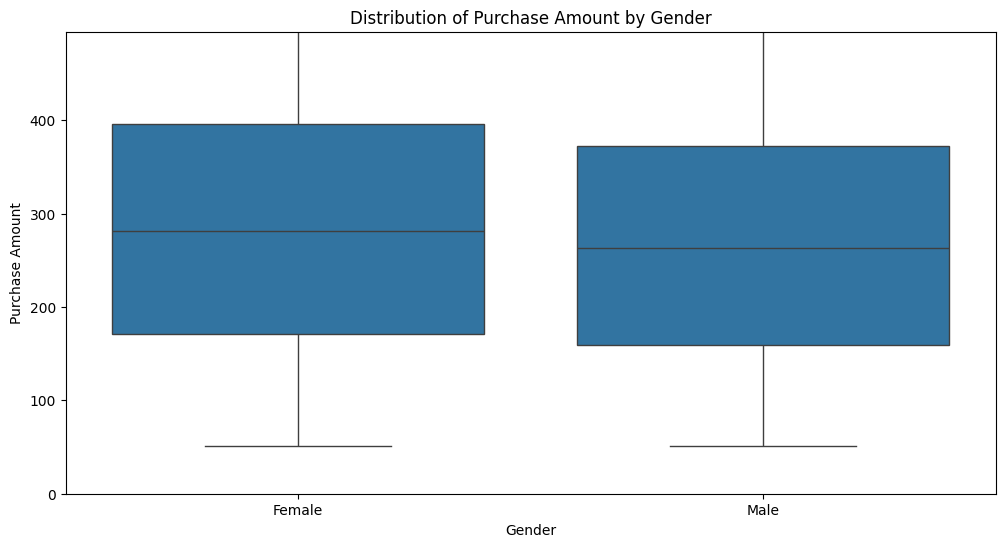

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 박스플롯 - 성별에 따른 구매금액 분포
sns.boxplot(x=custom_df["Gender"], y=custom_df["Purchase_Amount"])

# 그래프 제목 및 라벨 설정
plt.title("Distribution of Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount")
# plt.ylim(0, custom_df["Purchase_Amount"].quantile(0.99))  # 극단 이상치 제외

# 그래프 표시
plt.show()


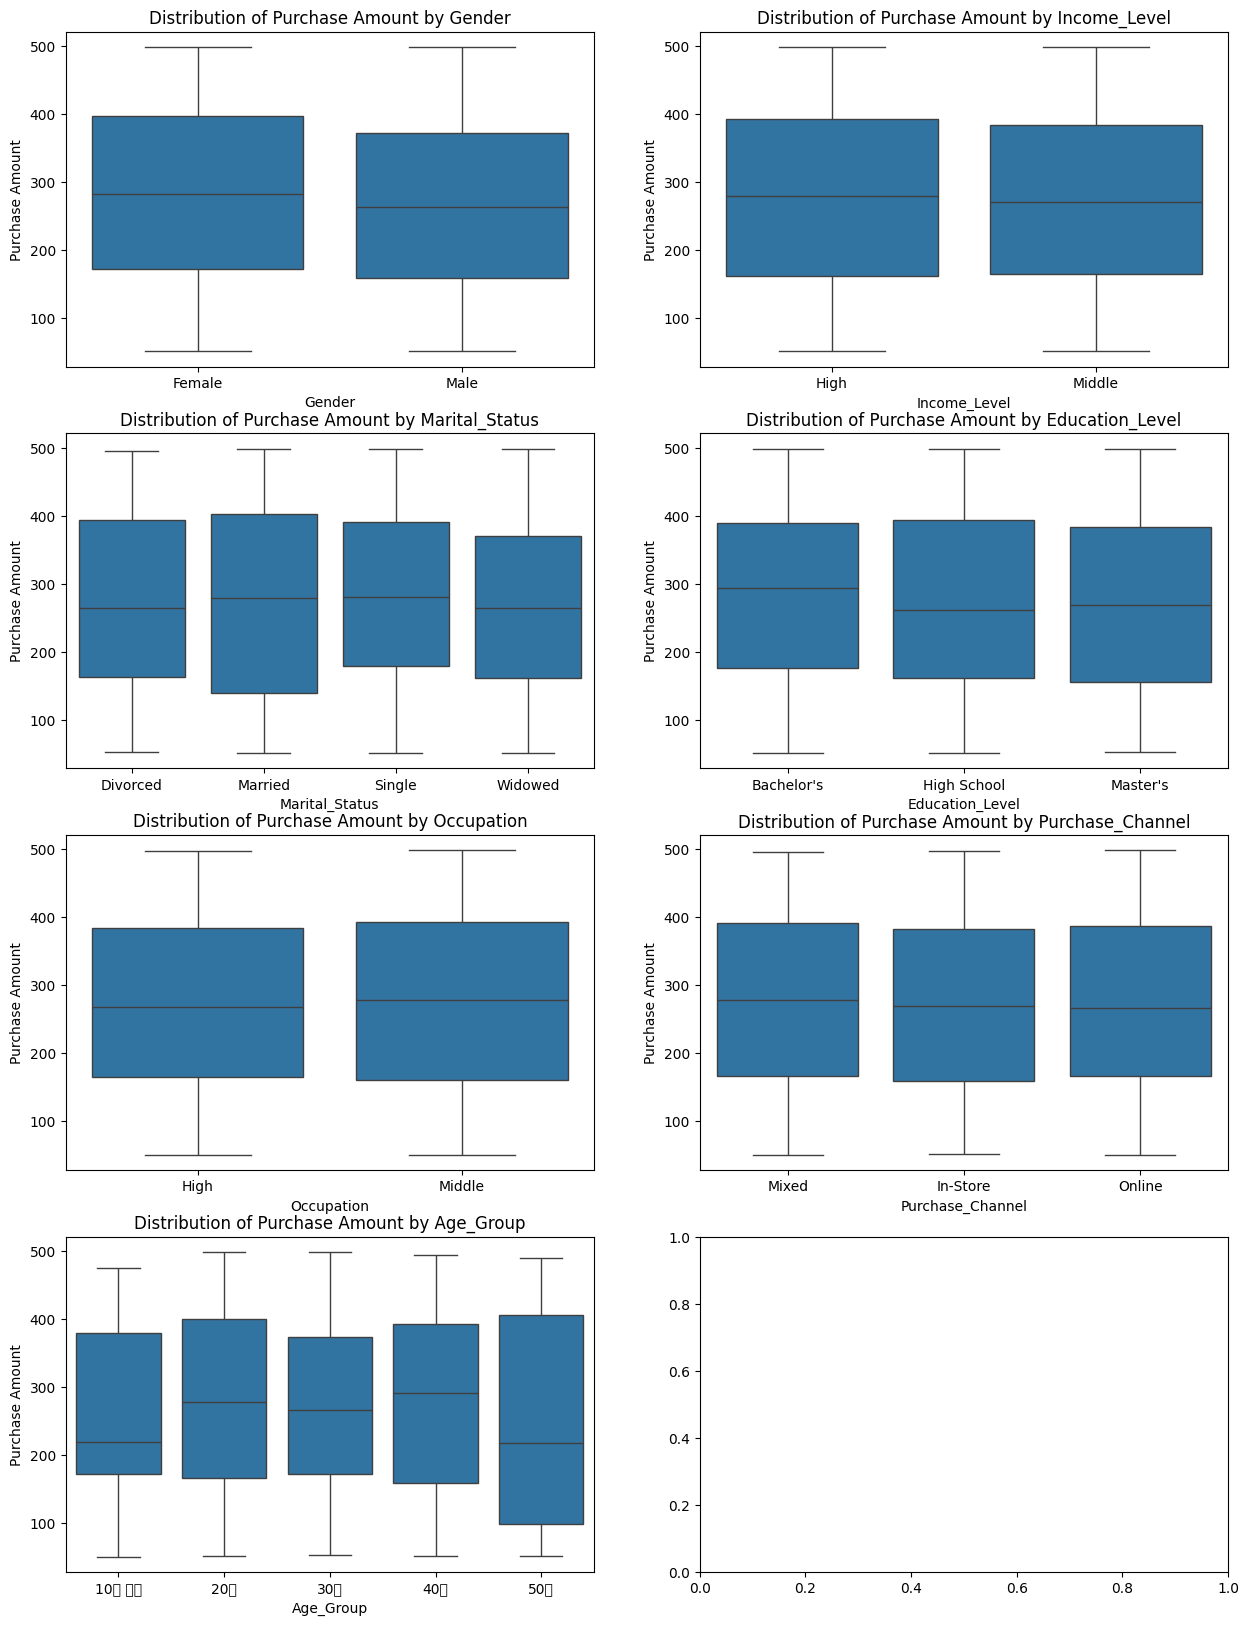

In [164]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 2x2 서브플롯 생성
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    sns.boxplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ax=ax)

    # 그래프 제목 및 라벨 설정
    ax.set_title(f"Distribution of Purchase Amount by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Purchase Amount")
    # plt.ylim(0, custom_df["Purchase_Amount"].quantile(0.99))  # 극단 이상치 제외

# 레이아웃 조정
# plt.tight_layout()
plt.show()


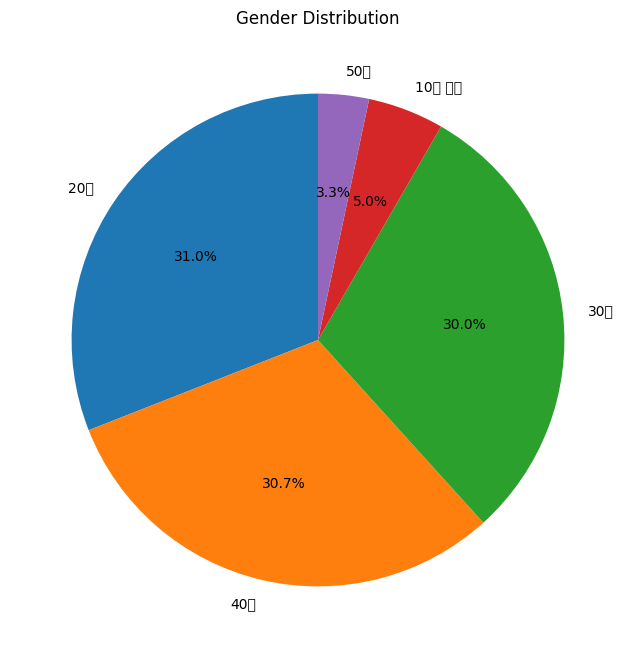

In [165]:
# Gender 컬럼의 비율을 계산
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']
gender_counts = custom_df["Age_Group"].value_counts()

#Education_Level
#Purchase_Channel
#Age_Group

# 파이 차트 생성
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,)

# 제목 설정
plt.title("Gender Distribution")

# 그래프 표시
plt.show()

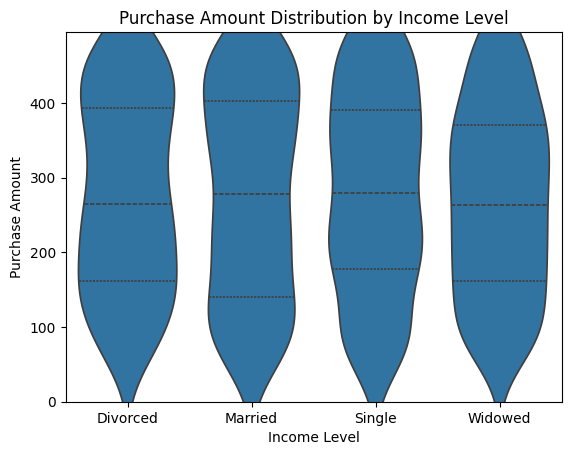

In [172]:
# 바이올린 플롯 - 소득 수준에 따른 구매금액 분포
sns.violinplot(x=custom_df["Marital_Status"], y=custom_df["Purchase_Amount"], inner="quartile")

plt.title("Purchase Amount Distribution by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Purchase Amount")
plt.ylim(0, custom_df["Purchase_Amount"].quantile(0.99))  # 극단 이상치 제외

plt.show()

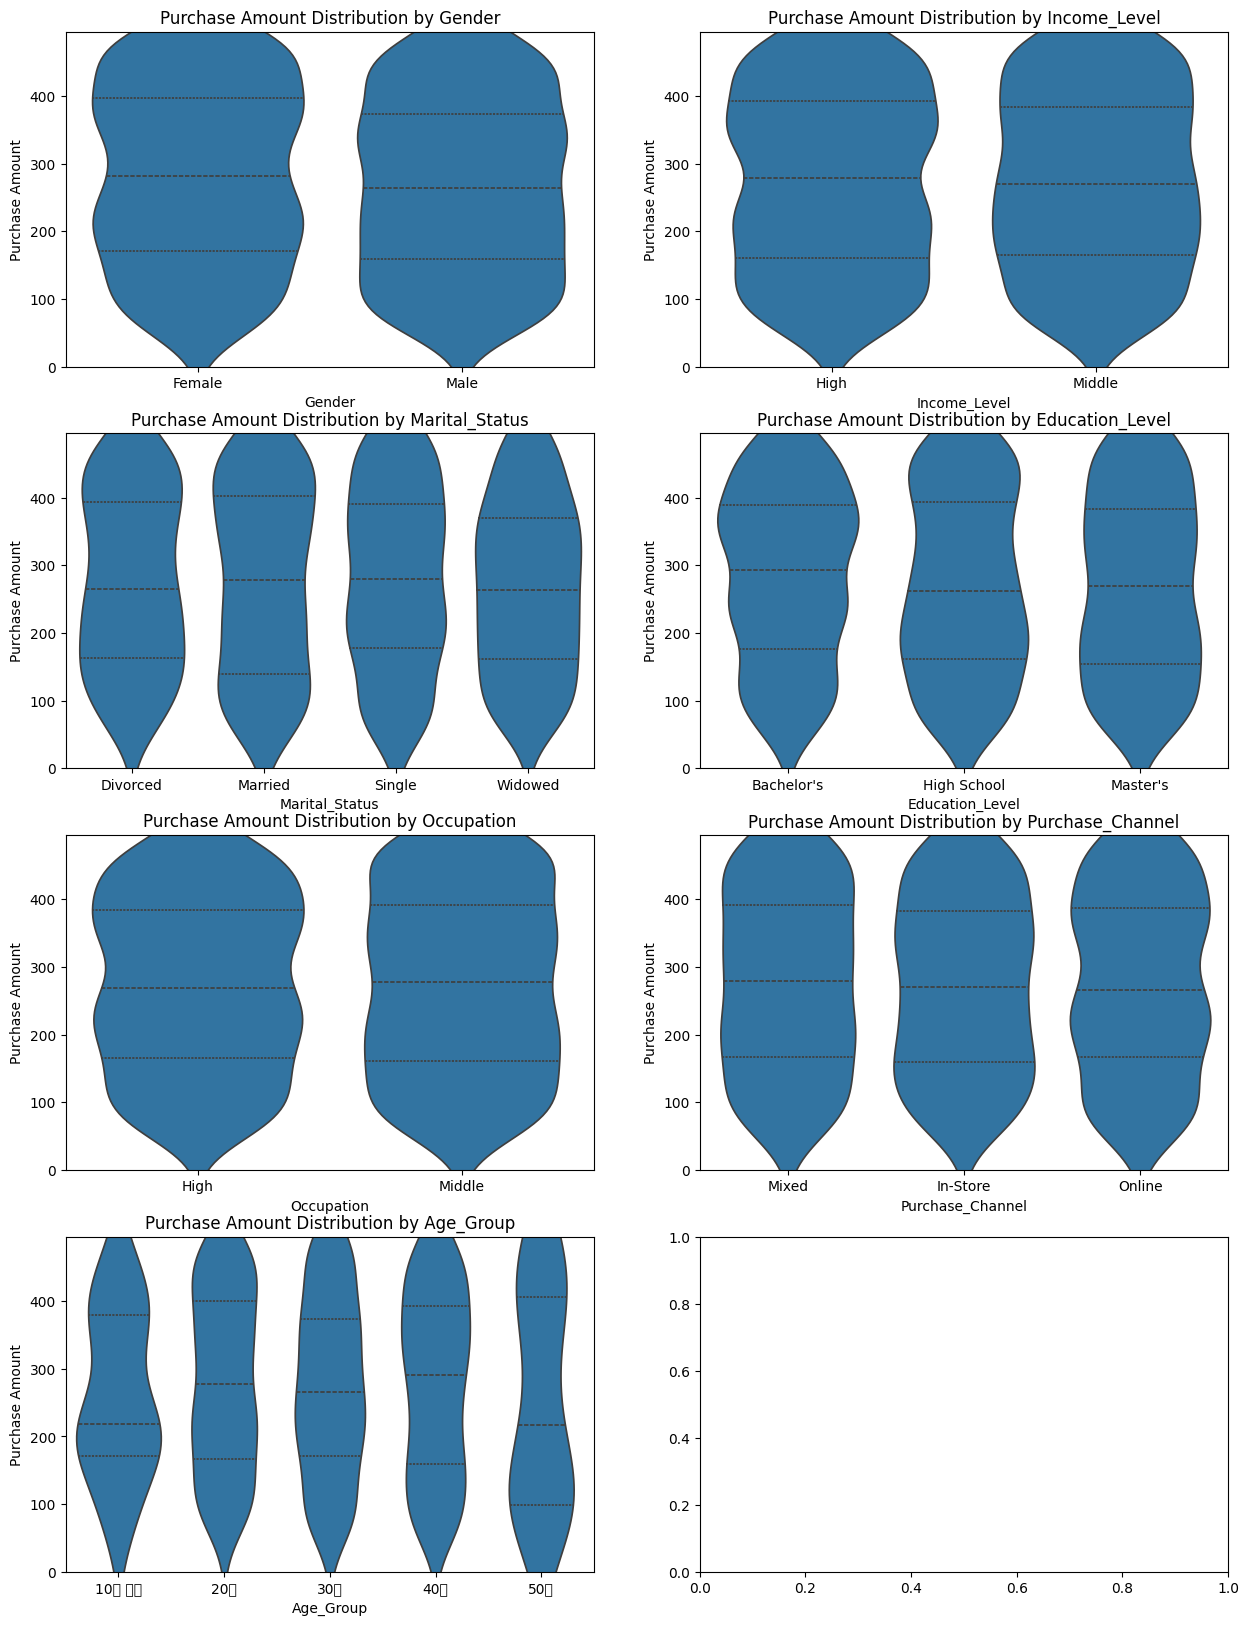

In [175]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 2x2 서브플롯 생성
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    sns.violinplot(x=custom_df[col], y=custom_df["Purchase_Amount"], inner="quartile", ax=ax)

    ax.set_title(f"Purchase Amount Distribution by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Purchase Amount")
    ax.set_ylim(0, custom_df["Purchase_Amount"].quantile(0.99))  # 극단 이상치 제외

# 레이아웃 조정
# plt.tight_layout()
plt.show()


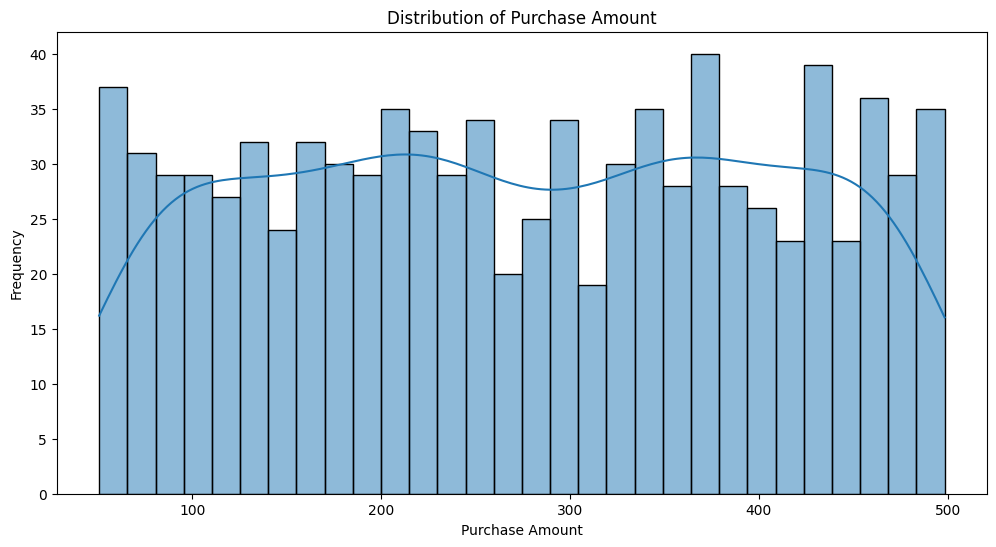

In [179]:
plt.figure(figsize=(12, 6))

# 히스토그램 - 구매 금액의 전체 분포 확인
sns.histplot(custom_df["Purchase_Amount"], bins=30, kde=True)

plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")

plt.show()

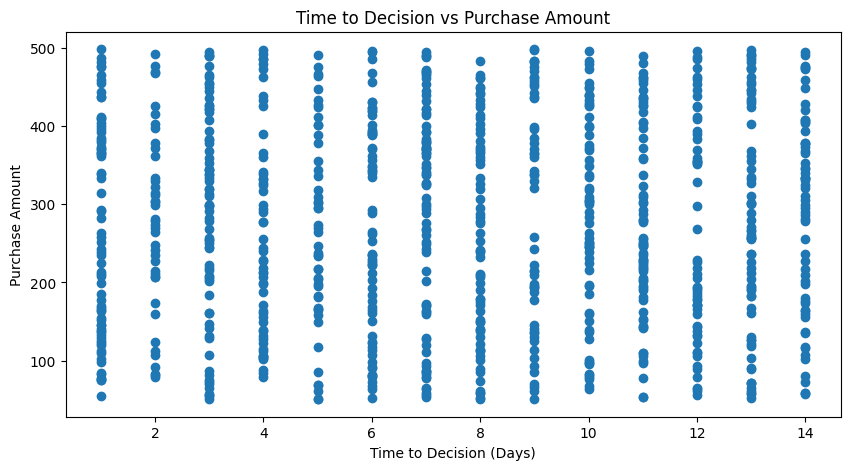

In [186]:
plt.figure(figsize=(10, 5))

# 산점도와 회귀선
plt.scatter(custom_df['Time_to_Decision'], custom_df['Purchase_Amount'])

plt.title("Time to Decision vs Purchase Amount")
plt.xlabel("Time to Decision (Days)")
plt.ylabel("Purchase Amount")
plt.show()


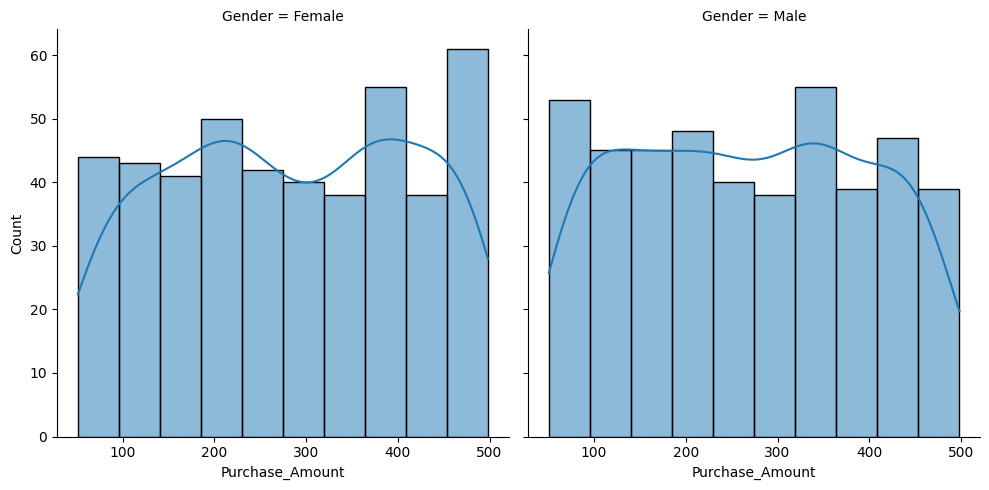

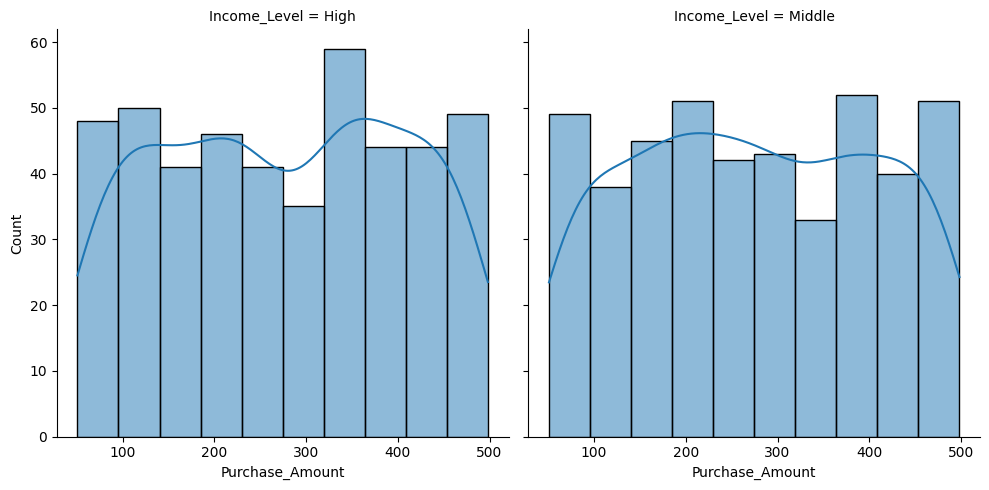

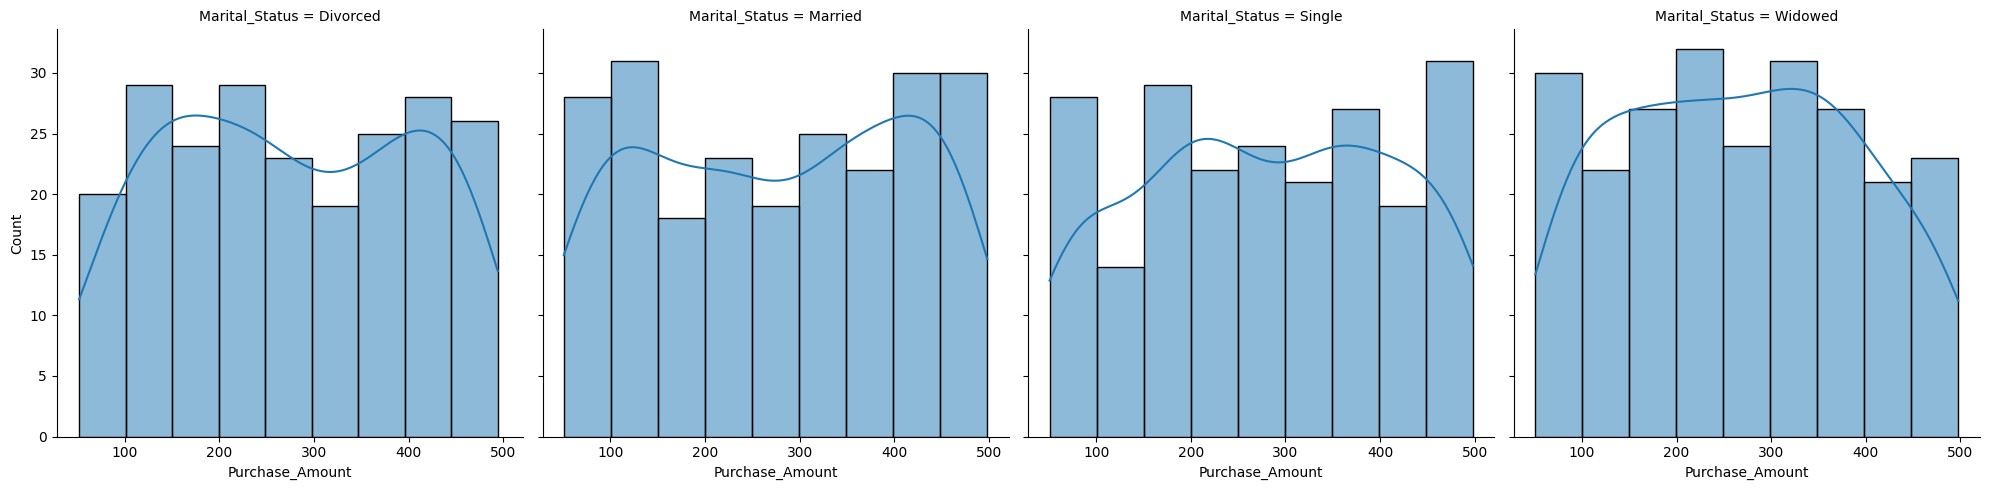

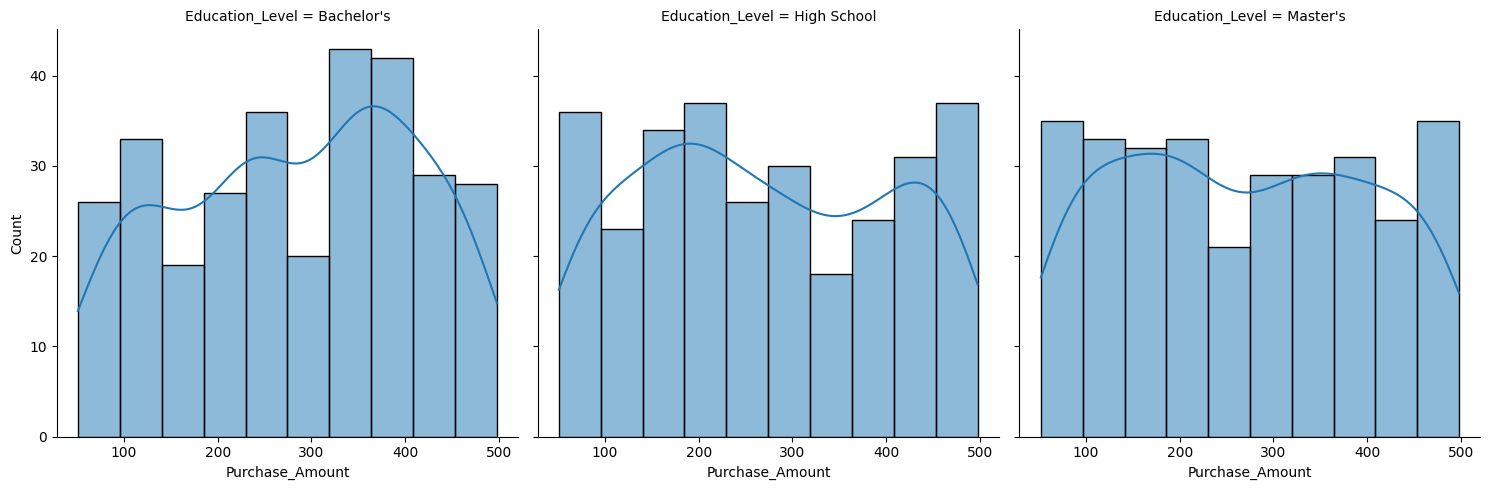

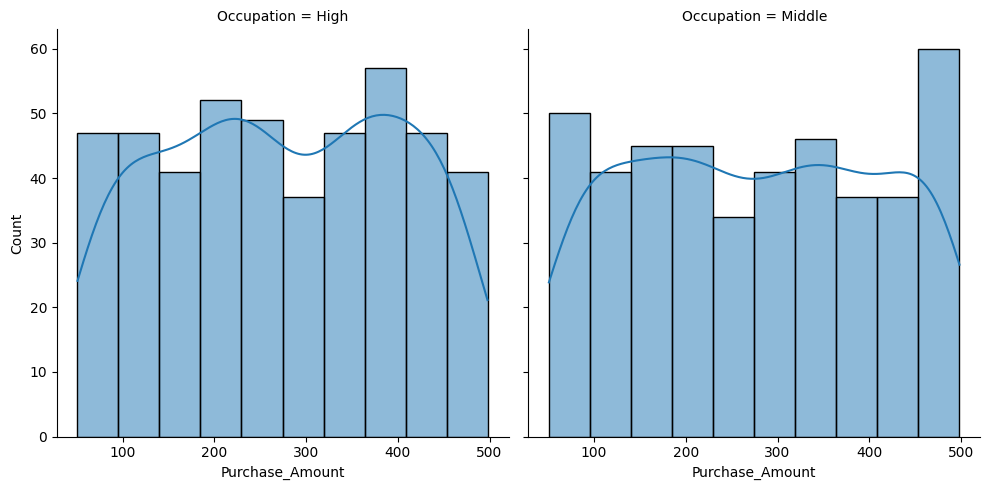

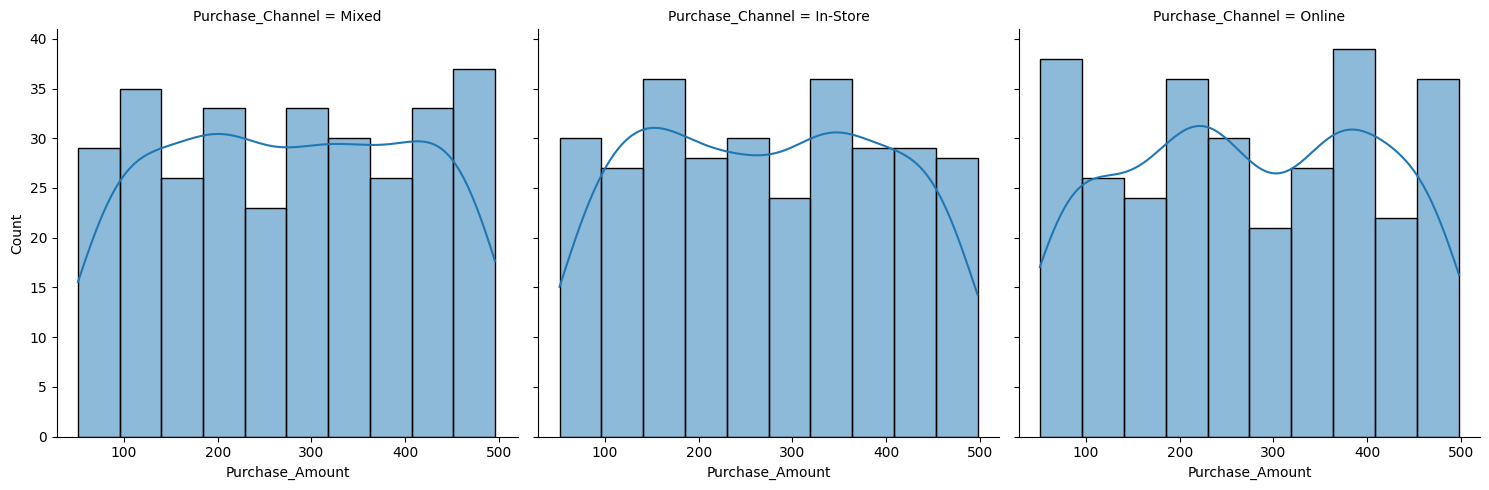

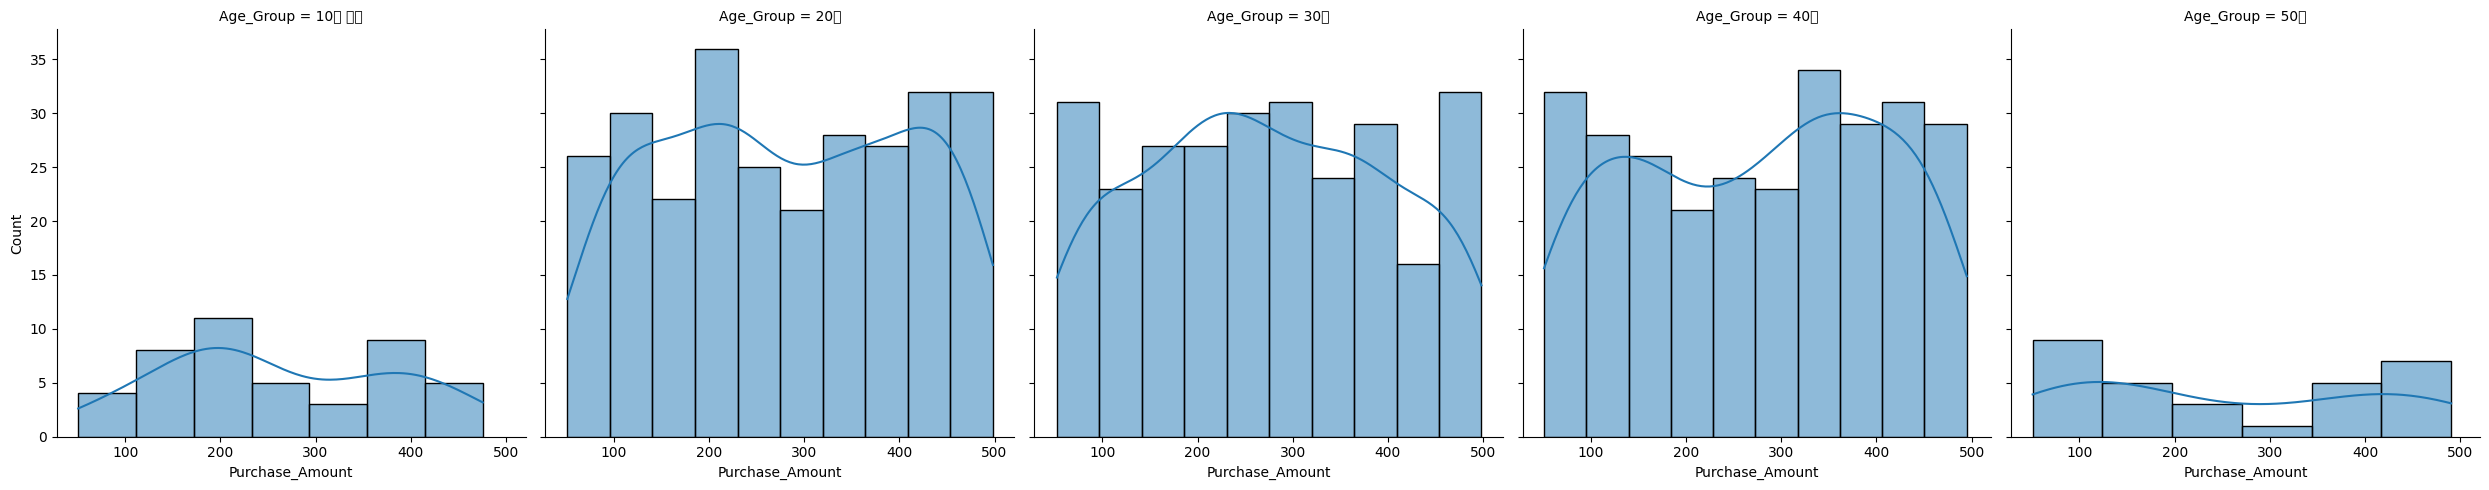

In [191]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    g = sns.FacetGrid(custom_df, col=col, height=5)
    g.map_dataframe(sns.histplot, x="Purchase_Amount", kde=True)


# 레이아웃 조정
# plt.tight_layout()
plt.show()


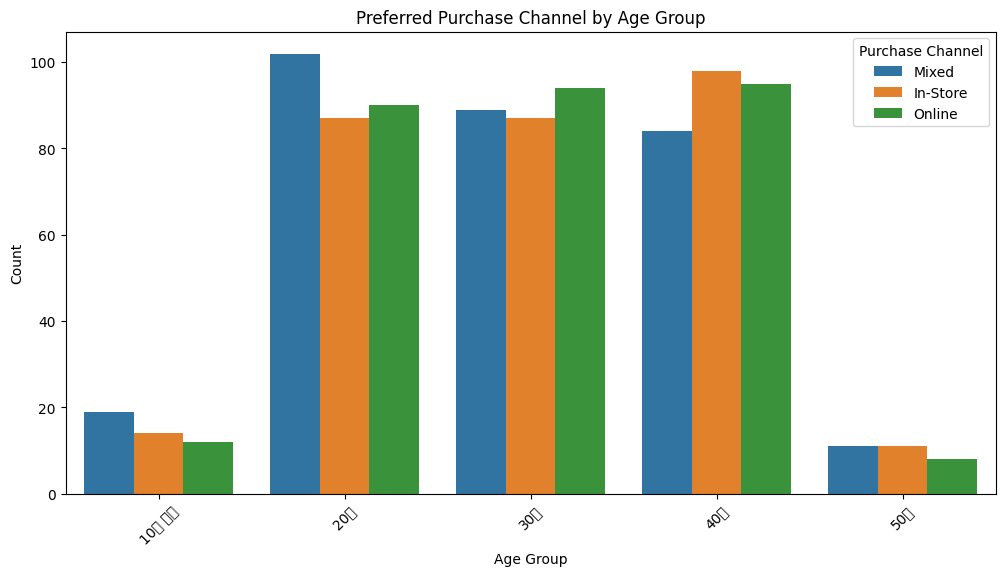

In [193]:
plt.figure(figsize=(12, 6))

sns.countplot(x=custom_df["Age_Group"], hue=custom_df["Purchase_Channel"])

plt.title("Preferred Purchase Channel by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Purchase Channel")
plt.xticks(rotation=45)

plt.show()
